In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Zad3

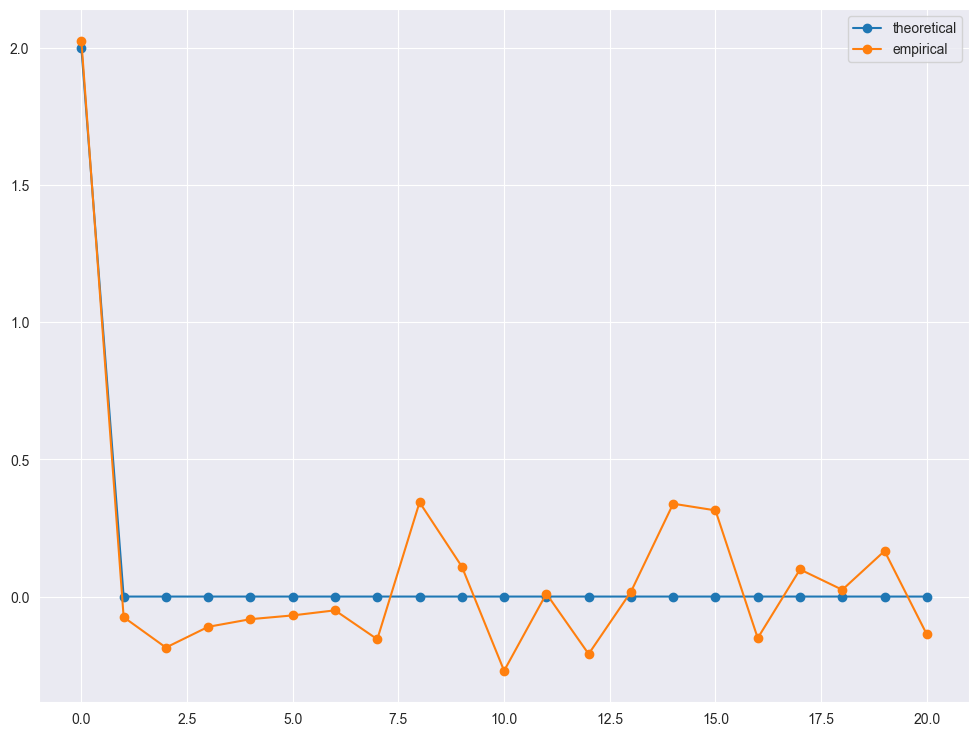

In [2]:
def autocov_theo(h, sigma):
    if h == 0:
        return sigma**2
    else:
        return 0
    
def autocov_emp(x, h):
    n = len(x)
    x_mean = np.mean(x)
    return 1/n * (np.sum((x[:n-h] - x_mean) * (x[h:] - x_mean)))

sigma = np.sqrt(2)
Xt = np.random.normal(0, sigma, 100)
h = np.arange(0, 21)

y_theo = []
y_emp = []
for i in h:
    y_theo.append(autocov_theo(i, sigma))
    y_emp.append(autocov_emp(Xt, i))

plt.figure(figsize=(12, 9))
plt.plot(h, y_theo, label='theoretical', marker='o')
plt.plot(h, y_emp, label='empirical', marker='o')
plt.legend()
plt.show()

# Zad4

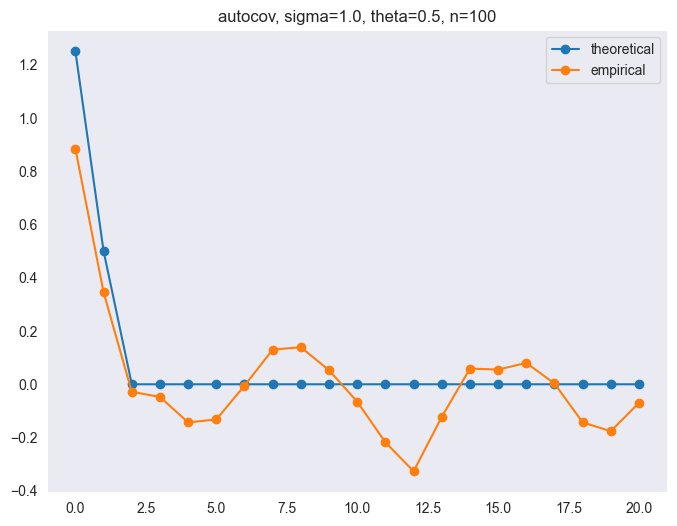

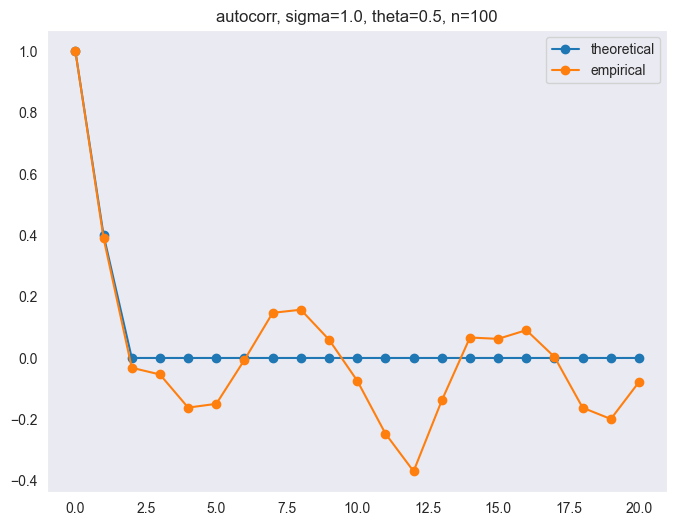

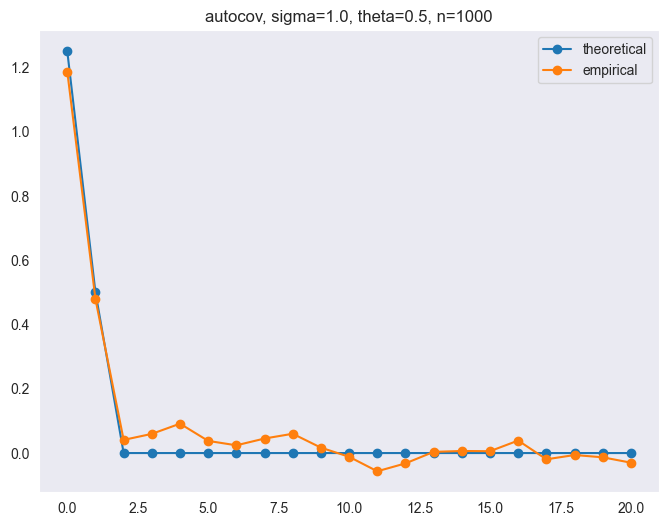

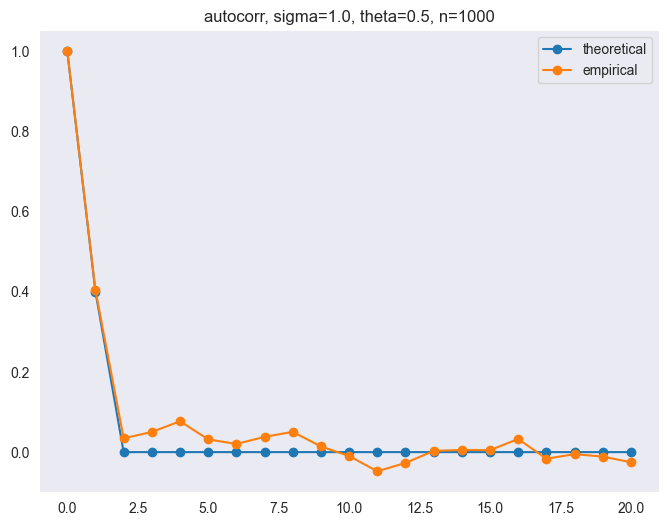

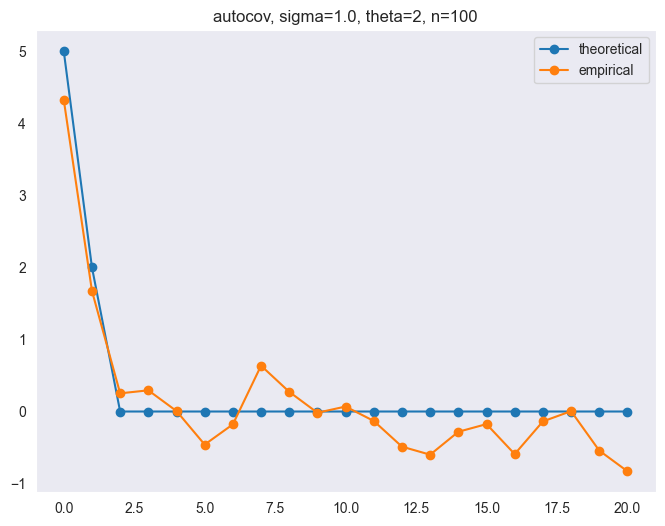

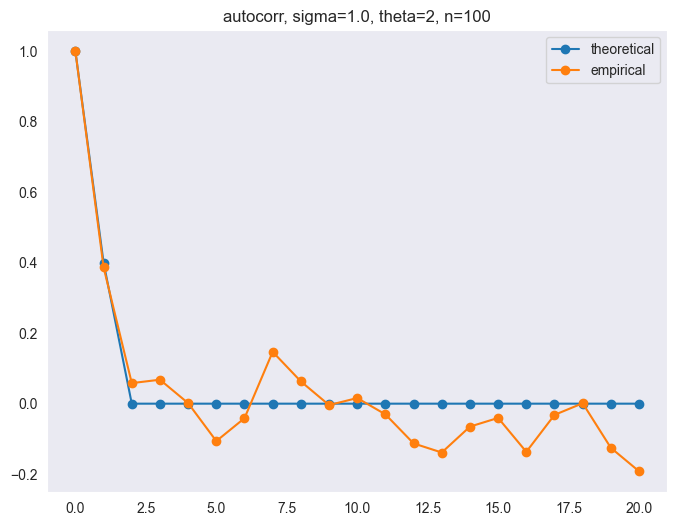

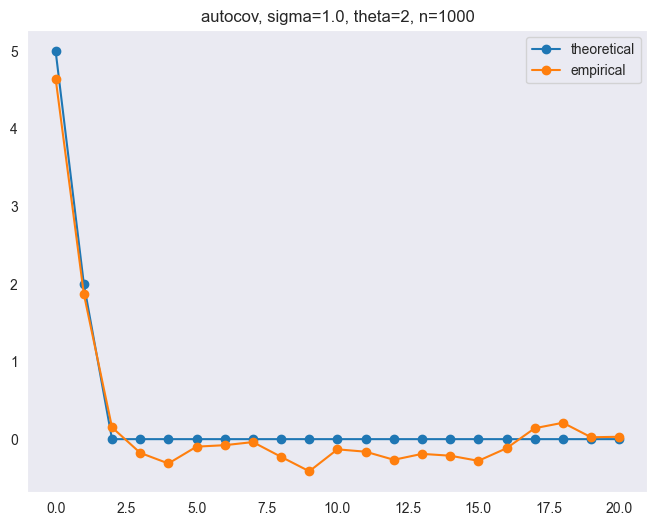

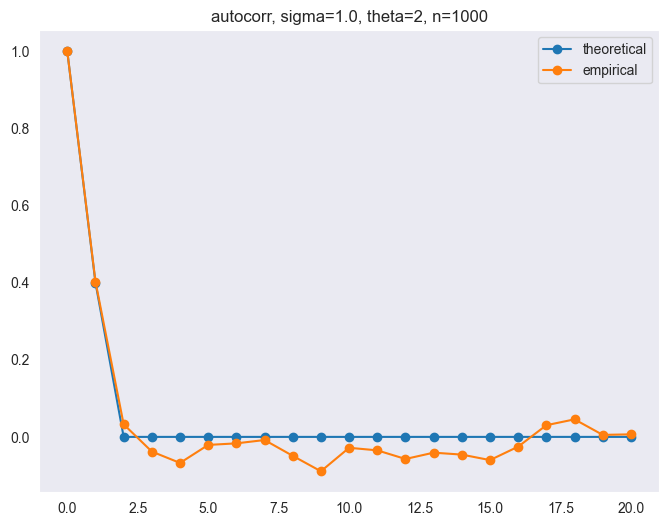

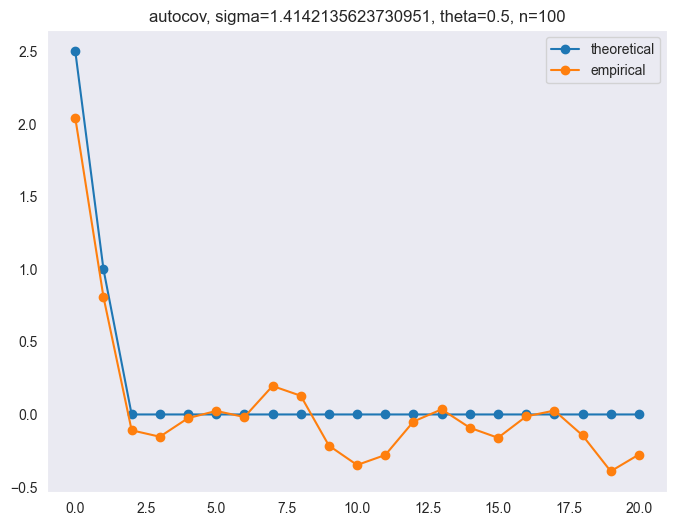

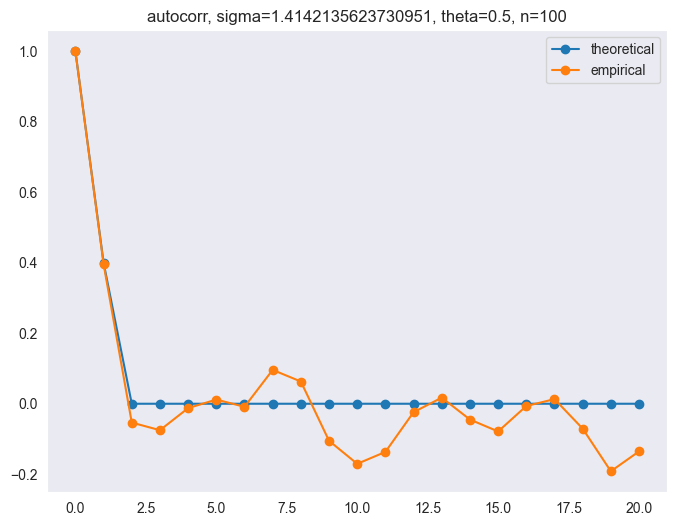

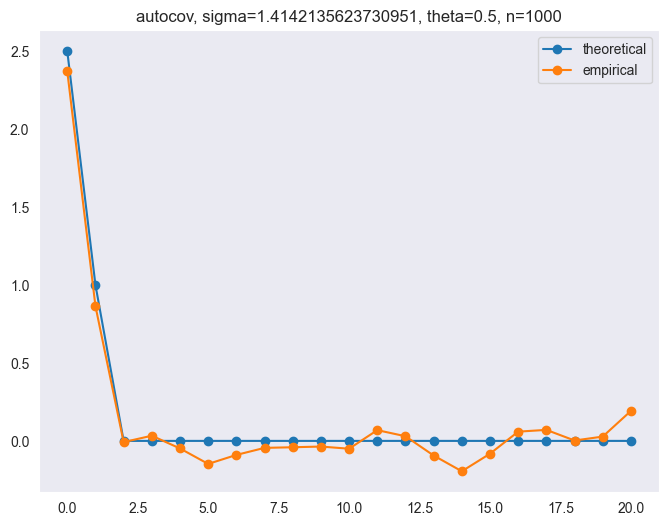

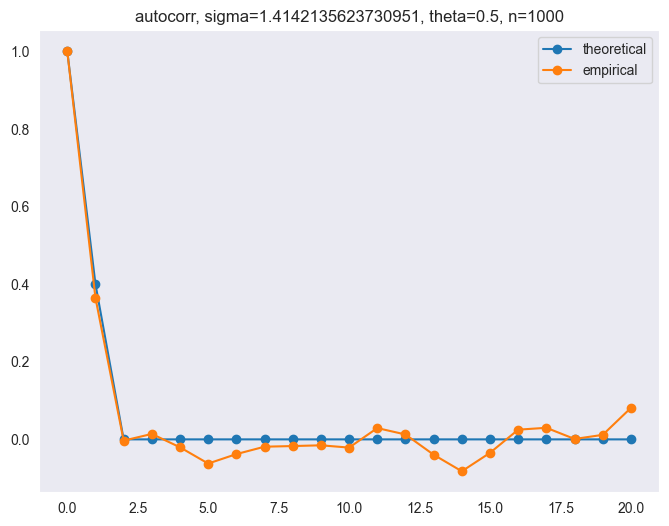

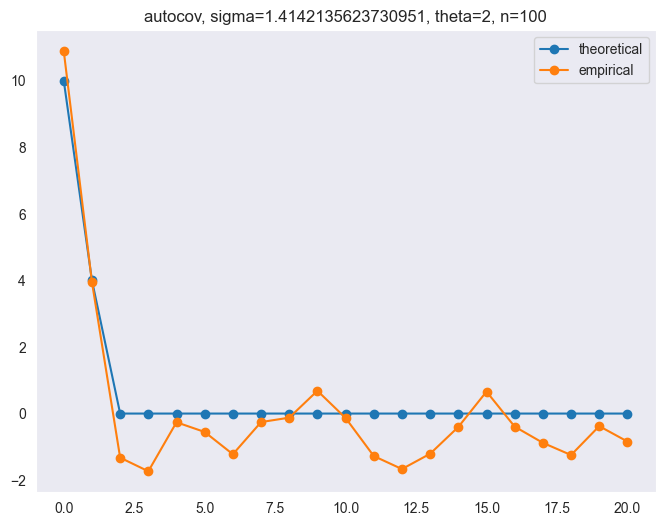

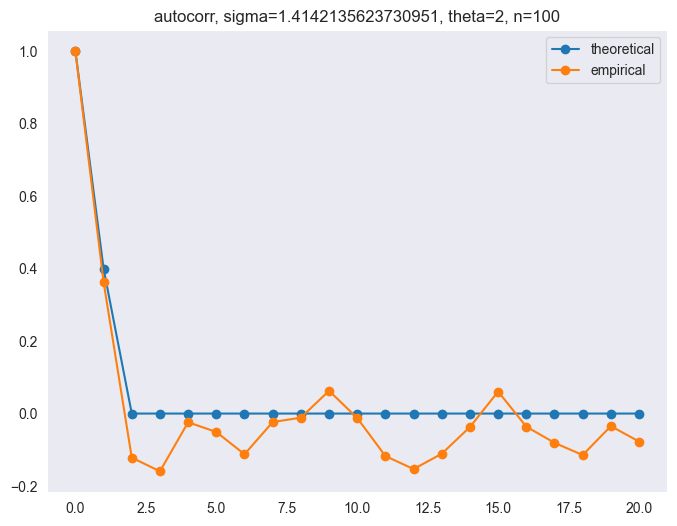

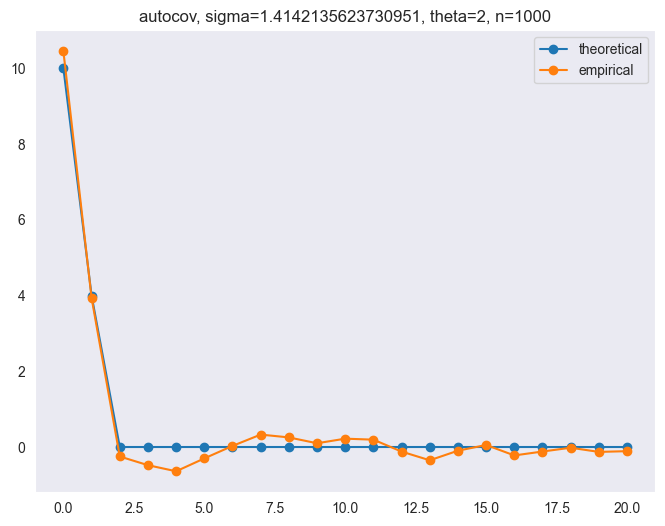

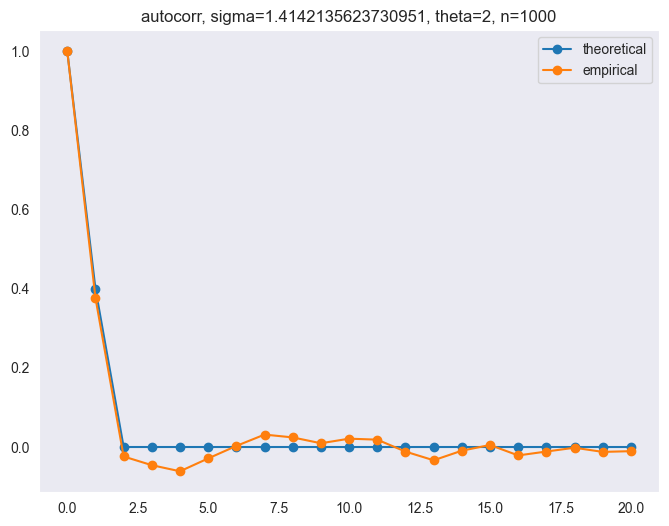

In [3]:
def autocov_theo(h, sigma, theta):
    if h == 0:
        return sigma**2 * (1 + theta**2)
    elif h == 1 or h == -1:
        return sigma**2 * theta
    else:
        return 0
    
def autocorr_theo(h, theta):
    if h == 0:
        return 1
    elif h ==1 or h == -1:
        return theta / (1 + theta**2)
    else:
        return 0
    
def autocov_emp(x, h):
    n = len(x)
    x_mean = np.mean(x)
    return 1/n * (np.sum((x[:n-h] - x_mean) * (x[h:] - x_mean)))

def autocorr_emp(x, h):
    return autocov_emp(x, h) / autocov_emp(x, 0)

h = np.arange(0, 21)
sigma_list = [np.sqrt(1), np.sqrt(2)]
theta_list = [0.5, 2]
N = [100, 1000]

for sigma in sigma_list:
    for theta in theta_list:
        for n in N:
            Zt = np.random.normal(0, sigma, n+1)
            Xt = Zt[1:] + theta * Zt[:-1]
            y_theo = []
            y_emp = []
            for i in h:
                y_theo.append(autocov_theo(i, sigma, theta))
                y_emp.append(autocov_emp(Xt, i))
            plt.figure(figsize=(8, 6))
            plt.plot(h, y_theo, label='theoretical', marker='o')
            plt.plot(h, y_emp, label='empirical', marker='o')
            plt.legend()
            plt.grid()
            plt.title(f'autocov, sigma={sigma}, theta={theta}, n={n}')
            plt.show()
            
            y_theo = []
            y_emp = []
            for i in h:
                y_theo.append(autocorr_theo(i, theta))
                y_emp.append(autocorr_emp(Xt, i))
            plt.figure(figsize=(8, 6))
            plt.plot(h, y_theo, label='theoretical', marker='o')
            plt.plot(h, y_emp, label='empirical', marker='o')
            plt.legend()
            plt.grid()
            plt.title(f'autocorr, sigma={sigma}, theta={theta}, n={n}')
            plt.show()

    


# Zad5

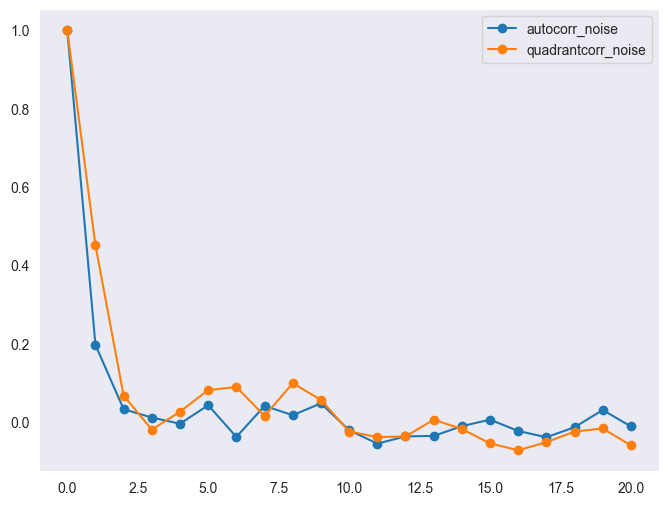

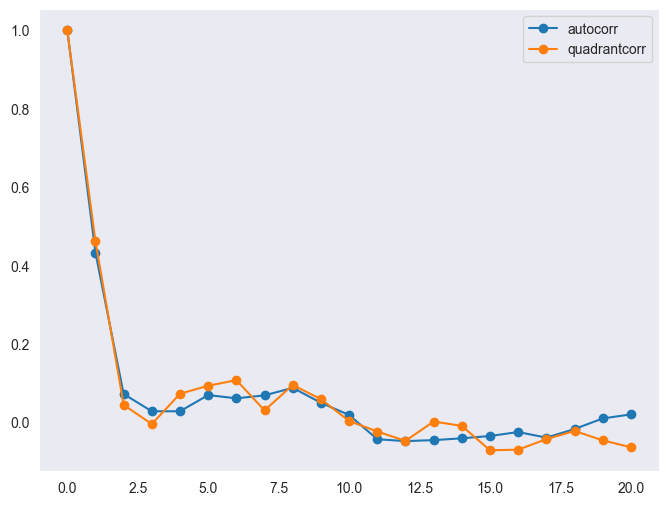

In [4]:
def autocov_emp(x, h):
    n = len(x)
    x_mean = np.mean(x)
    return 1/n * (np.sum((x[:n-h] - x_mean) * (x[h:] - x_mean)))


def autocorr_emp(x, h):
    return autocov_emp(x, h) / autocov_emp(x, 0)


def quadrant_corr(x, h):
    n = len(x)
    x_mean = np.mean(x)
    return np.sin(np.pi * (1/(n-h) * np.sum(np.sign((x[:n-h] - x_mean) * (x[h:] - x_mean)))) / 2)


N = 1000
MC = 100
theta = 0.5
mu = 0
sigma = 2
a = 15
p = 0.01
h_list = np.arange(0, 21)

Zt = np.random.normal(mu, np.sqrt(sigma), N+1)
et = np.random.uniform(0, 1, N)

Xt = Zt[1:] + theta * Zt[:-1]

Xt_noise = Xt.copy()

# bez szumu
autocorr_emp_list = []
quadrantcorr_list = []

for h in h_list:
    autocorr_emp_list.append(autocorr_emp(Xt, h))
    quadrantcorr_list.append(quadrant_corr(Xt, h))


# dodajemy szum
for i in range(len(et)):
    if et[i] < p/2:
        Xt_noise[i] += a
    elif p/2 <= et[i] <= p:
        Xt_noise[i] -= a
autocorr_emp_list_noise = []
quadrantcorr_list_noise = []

for h in h_list:
    autocorr_emp_list_noise.append(autocorr_emp(Xt_noise, h))
    quadrantcorr_list_noise.append(quadrant_corr(Xt_noise, h))
    

plt.figure(figsize=(8, 6))
plt.plot(h_list, autocorr_emp_list_noise, label='autocorr_noise', marker='o')
plt.plot(h_list, quadrantcorr_list_noise, label='quadrantcorr_noise', marker='o')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(h_list, autocorr_emp_list, label='autocorr', marker='o')
plt.plot(h_list, quadrantcorr_list, label='quadrantcorr', marker='o')
plt.legend()
plt.grid()
plt.show()
        


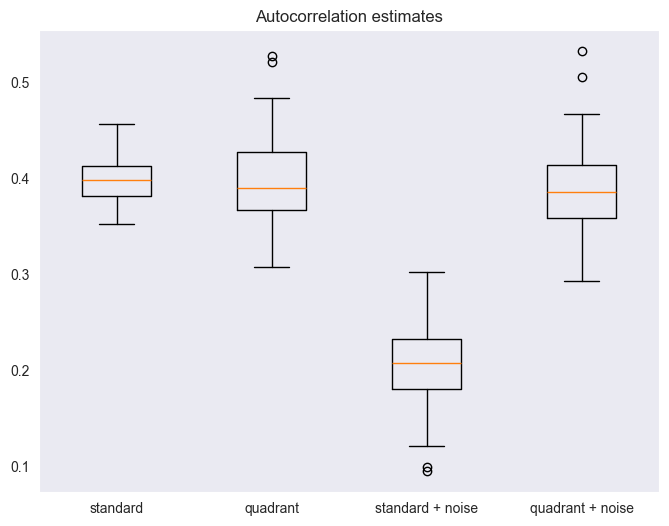

In [5]:
N = 1000
MC = 100
theta = 0.5
mu = 0
sigma = 2
a = 15
p = 0.01
h = 1

# bez szumu
autocorr_emp_list = []
quadrantcorr_list = []

# dodajemy szum
autocorr_emp_list_noise = []
quadrantcorr_list_noise = []

for _ in range(MC):
    Zt = np.random.normal(mu, np.sqrt(sigma), N+1)
    et = np.random.uniform(0, 1, N)

    Xt = Zt[1:] + theta * Zt[:-1]

    # bez szumu
    autocorr_emp_list.append(autocorr_emp(Xt, h))
    quadrantcorr_list.append(quadrant_corr(Xt, h))

    # dodajemy szum
    Xt_noise = Xt.copy()
    for i in range(len(et)):
        if et[i] < p/2:
            Xt_noise[i] += a
        elif p/2 <= et[i] <= p:
            Xt_noise[i] -= a
    autocorr_emp_list_noise.append(autocorr_emp(Xt_noise, h))
    quadrantcorr_list_noise.append(quadrant_corr(Xt_noise, h))

plt.figure(figsize=(8, 6))
plt.boxplot([autocorr_emp_list, quadrantcorr_list, autocorr_emp_list_noise, quadrantcorr_list_noise], labels=['standard', 'quadrant', 'standard + noise', 'quadrant + noise'])
plt.title('Autocorrelation estimates')
plt.grid()
plt.show()